In [1]:
import pandas as pd
import matplotlib.pyplot as plt
archivo_excel = r'C:\Users\Alejandro\Downloads\Salarios Científicos de datos.xlsx'

df = pd.read_excel(archivo_excel)

In [6]:
df.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [23]:
df1 = df.rename(columns={
    'experience_level' : 'Experience', 'employment_type' : 'Employment Type', 'job_title' : 'Job Title', 'salary_in_usd' : 'Salary', 'employee_residence' : 'Employee Residence', 'remote_ratio' : 'Remote', 'company_location' : 'Company Location', 'company_size' : 'Company Size'
})

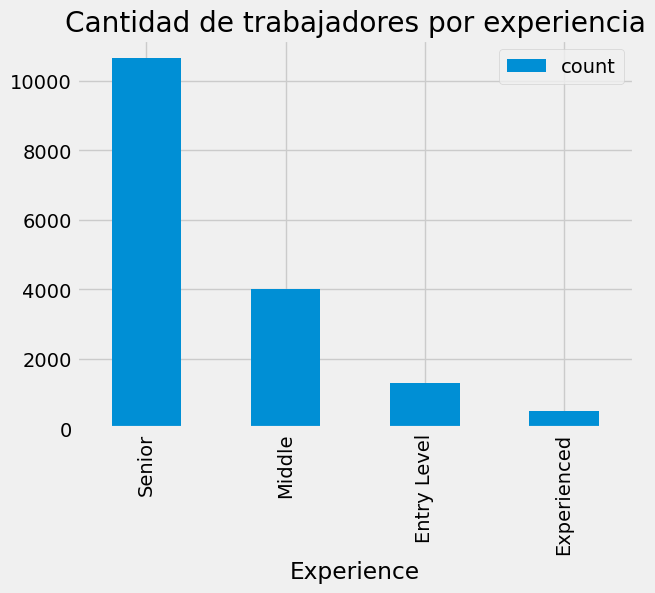

Experience
Senior         10652
Middle          4024
Entry Level     1319
Experienced      499
Name: count, dtype: int64

In [87]:
plt.style.use('fivethirtyeight')
df1['Experience'].value_counts().plot(kind='bar', title='Cantidad de trabajadores por experiencia')
plt.legend(loc='upper right')
plt.show()
df1['Experience'].value_counts()

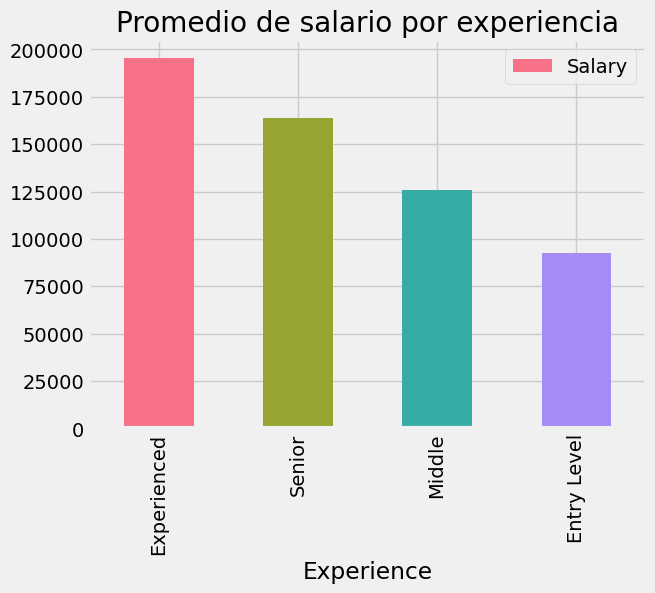

In [123]:
import seaborn as sns

promedio_experiencia = df1.groupby('Experience')['Salary'].mean().sort_values(ascending=False)
color = sns.color_palette('husl',len(promedio_experiencia))
promedio_experiencia.plot(kind='bar', title='Promedio de salario por experiencia', color=color)
plt.legend(loc='upper right')
plt.show()

In [42]:
df2 = df1.replace({'Remote' : {'5NO' : 'NO'}})

In [43]:
df2.groupby('Experience')['Remote'].value_counts()

Experience   Remote
Entry Level  NO         948
             SI         371
Experienced  NO         323
             SI         176
Middle       NO        2913
             SI        1111
Senior       NO        7149
             SI        3503
Name: count, dtype: int64

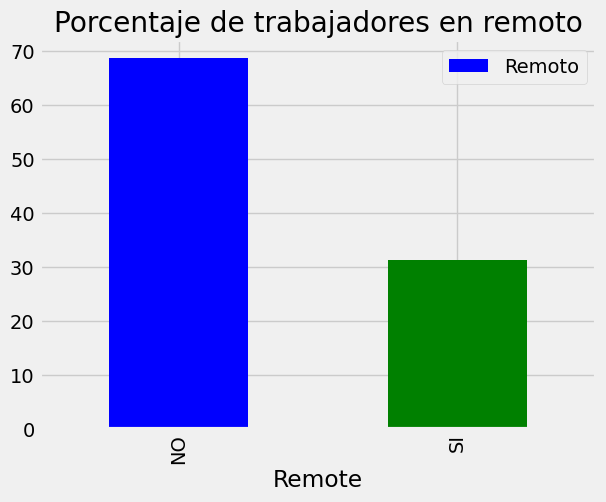

In [90]:
conteo_remoto = df2['Remote'].value_counts()
porcentaje_remoto = (conteo_remoto / len(df2)) * 100
porcentaje_remoto = porcentaje_remoto.round(2)

colores = ['blue', 'green']
grafica = porcentaje_remoto.plot(kind='bar', title='Porcentaje de trabajadores en remoto', color=colores)
plt.legend(['Remoto', 'No Remoto'], loc='upper right')
plt.show()

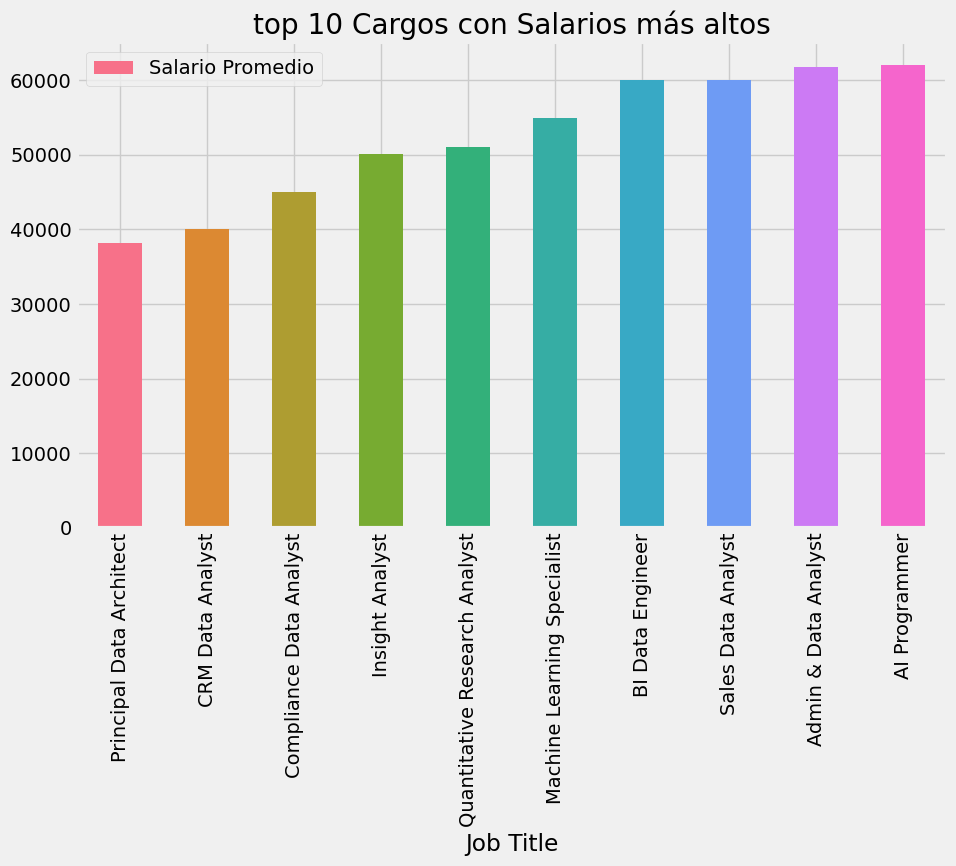

In [137]:
import seaborn as sns
n_grafica = df2.groupby('Job Title')['Salary'].mean().sort_values().head(10)
color = sns.color_palette('husl',len(n_grafica))
n_grafica.round().plot(kind='bar', figsize=(10, 6), color = color)
plt.title('top 10 Cargos con Salarios más altos')
plt.legend(['Salario Promedio'], loc='upper left')
plt.show()

In [102]:
df2.columns

Index(['Experience', 'Employment Type', 'Job Title', 'Salary',
       'Employee Residence', 'Remote', 'Company Location', 'Company Size'],
      dtype='object')

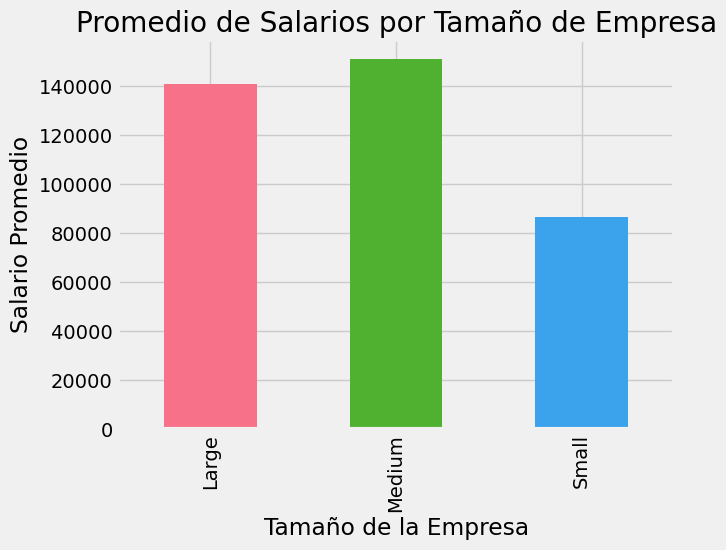

In [121]:
import seaborn as sns
salario_promedio_por_tamano = df2.groupby('Company Size')['Salary'].mean()
colores = sns.color_palette('husl', len(salario_promedio_por_tamano))
salario_promedio_por_tamano.plot(kind='bar', title='Promedio de Salarios por Tamaño de Empresa', color=colores)
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario Promedio')
plt.show()

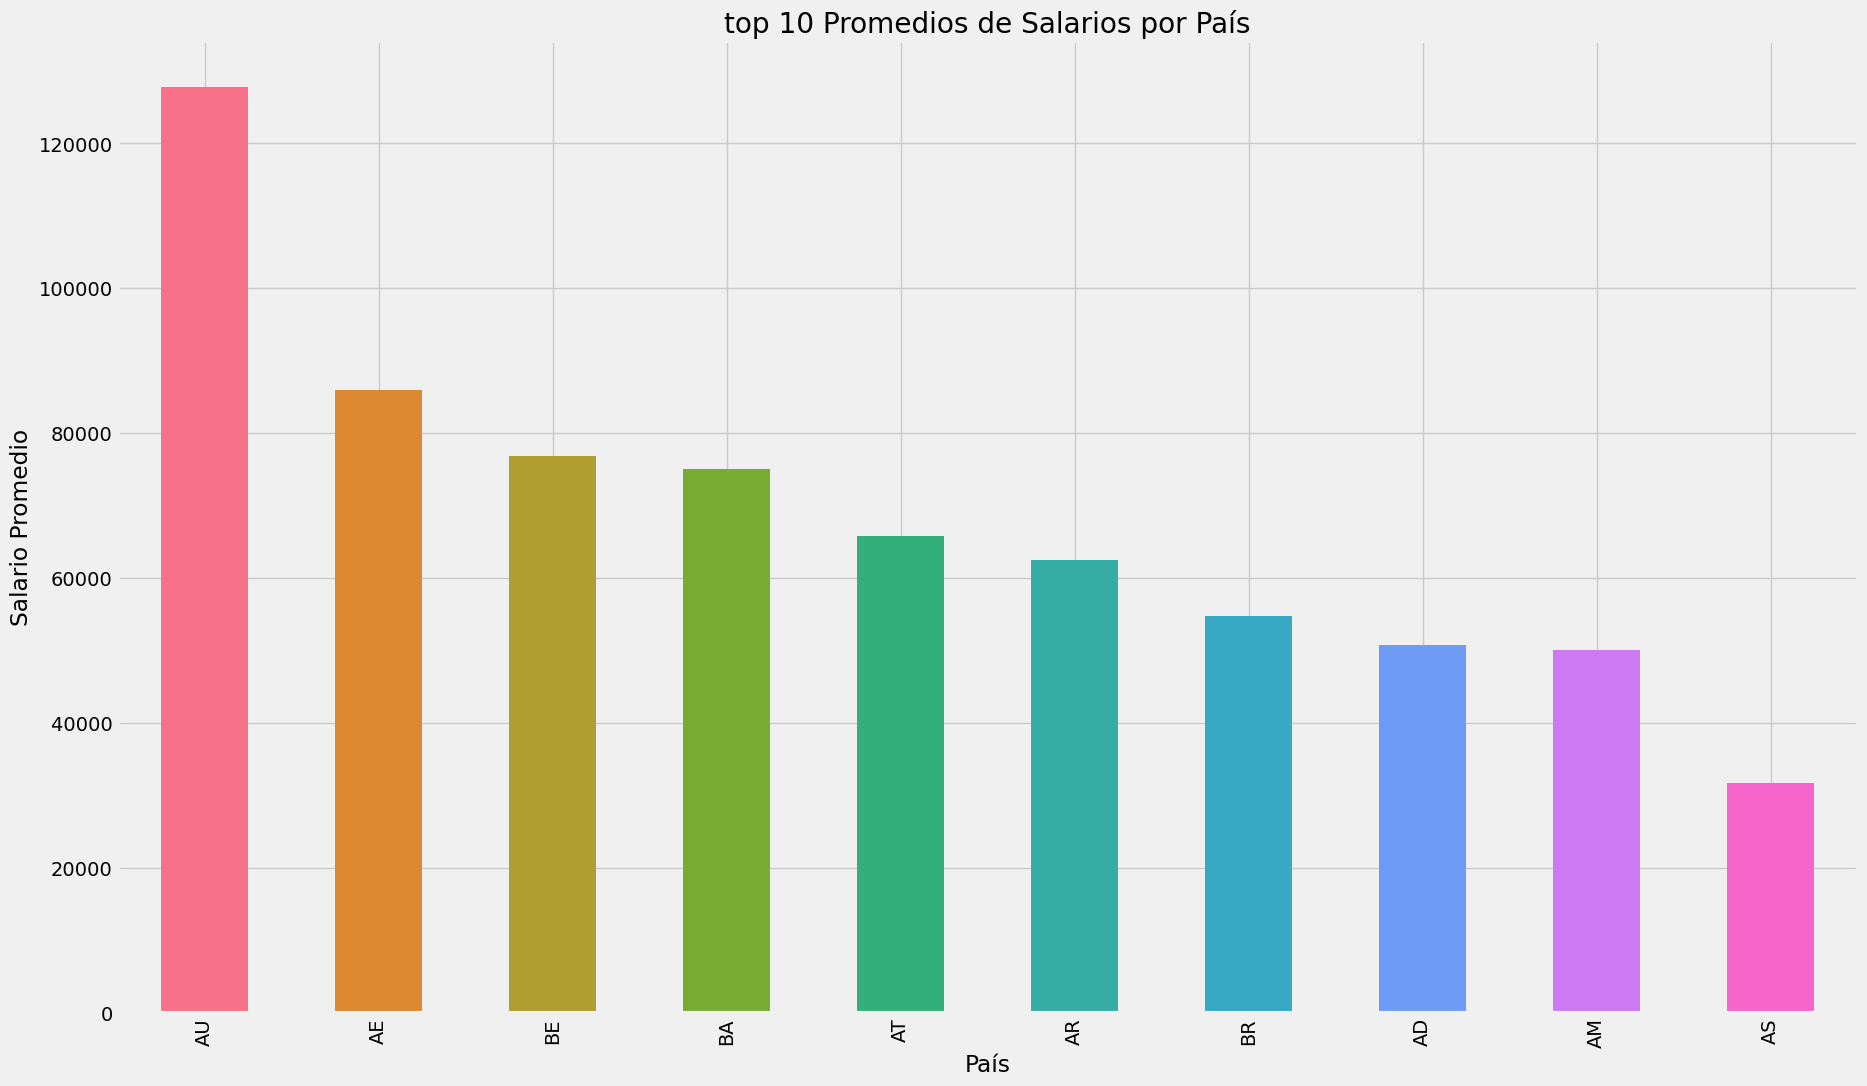

In [129]:
import seaborn as sns

salario_promedio_por_pais = df2.groupby('Company Location')['Salary'].mean().head(10)
salario_promedio_por_pais = salario_promedio_por_pais.sort_values(ascending=False)

colores = sns.color_palette('husl', len(salario_promedio_por_pais))

salario_promedio_por_pais.plot(kind='bar', figsize=(20, 12), color=colores)
plt.title('top 10 Promedios de Salarios por País')
plt.xlabel('País')
plt.ylabel('Salario Promedio')

plt.show()